# Machine Learning for Cancer Prediction

This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor:

* BRCA: Breast invasive carcinoma
        BRCA is a type of cancer that starts in the cells of the breast. It is one of the most common cancers among women worldwide and can occur in both men and women, although it is much more common in women.
* KIRC: Kidney renal clear cell carcinoma
        KIRC is a type of kidney cancer that begins in the lining of the kidney tubules. It is the most common type of kidney cancer, accounting for about 70-75% of all kidney cancer cases.
* COAD: Colon adenocarcinoma
        COAD is a type of cancer that develops in the colon or rectum and arises from the glands in the lining of the colon and rectum. It is one of the most common forms of colorectal cancer.
* LUAD: Lung adenocarcinoma
        LUAD is a type of non-small cell lung cancer that begins in the cells that line the airways of the lungs. It is the most common type of lung cancer, accounting for about 40% of lung cancer cases.
* PRAD: Prostate adenocarcinoma
        PRAD is a type of cancer that develops in the prostate gland, which is a part of the male reproductive system. It is one of the most common cancers among men and usually grows slowly, but it can spread to other parts of the body if not treated early.

Variable Information
A dummy name (gene_XX) is given to each attribute. Check the original submission (https://www.synapse.org/#!Synapse:syn4301332), or the platform specs for the complete list of probes name. The attributes are ordered consitently with the original submission.

Samples (instances) are stored row-wise. Variables (attributes) of each sample are RNA-Seq gene expression levels measured by illumina HiSeq platform.

# Import Python Libraries

In [2]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score


# Read in the Data

In [3]:
df = pd.read_csv('C:/Users/arutherford/Documents/Python Scripts/Dataset/UCI_GeneExpression.csv')

In [4]:
labels = pd.read_csv('C:/Users/arutherford/Documents/Python Scripts/Dataset/UCI_GeneExpression_labels.csv')

In [6]:
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [7]:
df.shape

(801, 20532)

In [8]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [9]:
labels.shape

(801, 2)

Check for missing values

In [10]:
df.isnull().sum().sort_values(ascending = False)

Unnamed: 0    0
gene_13794    0
gene_13692    0
gene_13691    0
gene_13690    0
             ..
gene_6841     0
gene_6840     0
gene_6839     0
gene_6838     0
gene_20530    0
Length: 20532, dtype: int64

In [11]:
labels.isnull().sum().sort_values(ascending = False)

Unnamed: 0    0
Class         0
dtype: int64

# Exploratory Data Visualization

In [12]:
labels.value_counts('Class')

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

Create a new column that has the cancer class labels 'Class'

In [13]:
merged_df = pd.merge(df, labels, on='Unnamed: 0', how='left')

In [14]:
merged_df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [15]:
print(merged_df['Class'].value_counts())

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


<Axes: xlabel='Class'>

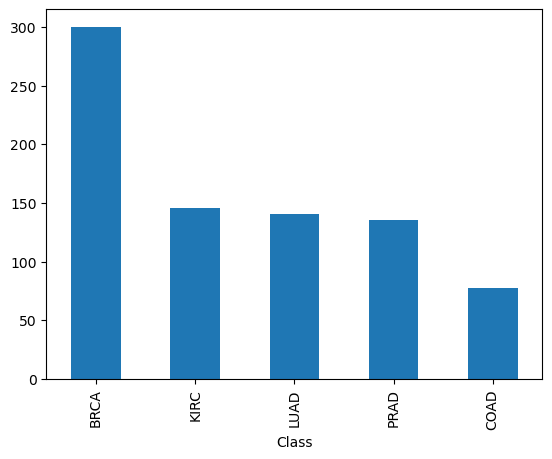

In [16]:
merged_df['Class'].value_counts().plot.bar()


remove the sample ID 'Unnamed: 0' colum

In [17]:
merged_df = merged_df.drop(columns=['Unnamed: 0'])

# Data Processing

We need to put the data into a format that is compatible with Scikitlearn.

Seperate the feature values from the class. we do this because scikit-learn requires that features and class

In [18]:
X=merged_df.iloc[:,0:-1]
y=merged_df.iloc[:,-1]

In [19]:
X

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [20]:
y

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

Encoding labels

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.



In [21]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [22]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [23]:
classes

array([0, 1, 2, 3, 4])

# Data Splitting

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X, y_encoded, test_size=0.2,random_state=1)

In [25]:
merged_df.iloc[:,0:10].describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604


# Data Normalization
Data normalization is done so that the values are in the same range. This will improve model performance and avoid bias

In [26]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Assuming X_train is your feature matrix
# Identify categorical columns
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])

# Apply MinMax scaling
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)


# Feature Selection
The purpose of feature selection is to select relevant features for classification. Feature selection is usually used as a pre-processing step before doing the actual learning.

In this tutorial, mutual information algorithm is used to compute the relevance of each feature. The top n (eg. 300) features are selected for the machine learning analysis.

Mutual information Feature selection

In [27]:
MI=mutual_info_classif(X_train_scaled,y_train)

Select the top arbitrary n nuber of features 

In [28]:
n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [29]:
X_train_selected=X_train_scaled[:,selected_scores_indices]
X_test_scaled = min_max_scaler.transform(X_test)  # Assuming you want to scale X_test
X_test_selected = X_test_scaled[:, selected_scores_indices]


In [74]:
# Drop non-numeric columns from X_test
#X_test_numeric = X_test.drop(columns=categorical_cols)

# Scale the numeric columns in X_test
#X_test_scaled = min_max_scaler.transform(X_test_numeric)

# Select the relevant features
#X_test_selected = X_test_scaled[:, selected_scores_indices]

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Unnamed: 0


In [30]:
X_train_selected.shape

(640, 300)

In [31]:
X_test_selected.shape


(161, 300)

# Classification

Random forest is suitable for handling multiclass and high-dimensional data. The classification process entails both training and testing the model.

# Model Training

In [32]:
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

In [33]:
RF

OneVsRestClassifier(estimator=RandomForestClassifier(max_features=0.2))

# Model Evaluation
After training the model, it is important to know how the model performs on an independent data(i.e. the test data). The following metrics are used to evaluate the model

* accuracy
* precision
* recall
* f1 score
* confusion matrix
* ROC Curve


In [34]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9875
precision:0.9880
recall:0.9876
f1score:0.9875


classification report


              precision    recall  f1-score   support

        BRCA       0.96      1.00      0.98        55
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      1.00      1.00        25
        LUAD       1.00      0.94      0.97        32
        PRAD       1.00      1.00      1.00        32

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161

